In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [109]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [110]:
df.shape

(546, 12)

In [111]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


# Linear Regression using Normal Equation
#### Without Normalisation

In [116]:
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']].values
y = df['price'].values

In [117]:
print(x.shape, y.shape)
lambda1 = 20
t = np.ones((m,1))
x = np.hstack((t,x))

(546, 5) (546,)


In [118]:
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lambda1*np.identity(x.shape[1])),np.dot(x.T,y))
w.reshape((6,))

array([-3.67499758e+02,  4.82741384e+00,  2.74556952e+03,  1.39000134e+04,
        7.75436160e+03,  5.21441944e+03])

In [119]:
h = np.dot(x,w)
h.shape

(546,)

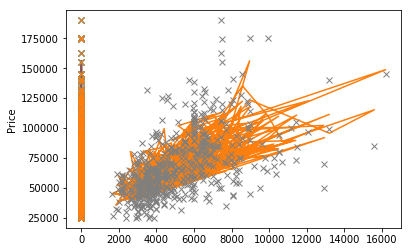

Note: If x consists of more than one feature, the plot would not make any sense.
Reason: The n-dimentions (n features) would be displayed in 2 dimentions.


In [120]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()
print("Note: If x consists of more than one feature, the plot would not make any sense.")
print("Reason: The n-dimentions (n features) would be displayed in 2 dimentions.")

In [123]:
score = np.sum((np.abs(np.divide((h-y),y))))/h.size
print("Score using naive Linear Regression: " + str(score))
print(w)

Score using naive Linear Regression: 0.20694516982525352
[-3.67499758e+02  4.82741384e+00  2.74556952e+03  1.39000134e+04
  7.75436160e+03  5.21441944e+03]


# Linear Regression using Normal Equation 
#### With Normalisation

In [155]:
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']].values
y = df['price']
x

array([[5850,    3,    1,    2,    1],
       [4000,    2,    1,    1,    0],
       [3060,    3,    1,    1,    0],
       ...,
       [6000,    3,    2,    4,    1],
       [6000,    3,    2,    2,    1],
       [6000,    3,    1,    2,    1]])

In [159]:
print(x.shape, y.shape)
lambda1 = 20
x.shape[1]
# Normalizing x and y
x = nup.
x = (x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
y = (y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))
t = np.ones((m,1))
x = np.hstack((t,x))
x

(546, 7) (546,)


array([[1.        ,        nan,        nan, ..., 0.        , 0.33333333,
        0.33333333],
       [1.        ,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [1.        ,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        ,        nan,        nan, ..., 0.33333333, 1.        ,
        0.33333333],
       [1.        ,        nan,        nan, ..., 0.33333333, 0.33333333,
        0.33333333],
       [1.        ,        nan,        nan, ..., 0.        , 0.33333333,
        0.33333333]])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [153]:
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lambda1*np.identity(x.shape[1])),np.dot(x.T,y))
w

array([nan, nan, nan, nan, nan, nan])

# Gradient Descent
#### With Normalisation and Regularisation

In [161]:
df.head()
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']].values
y = df['price'].values

In [166]:
# Normalizing x and y
x = (x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
y = (y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [163]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))

t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (546, 5)
y.shape: (546,)
m: 546
n: 5
x.shape after appending a column for bias: (546, 6)


In [164]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.005 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
lambda1 = 200
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


In [165]:
# h = np.dot(x,w.T)
# plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
# plt.xlabel('Lotsize')
# plt.ylabel('Price')
# plt.show()
print(w)

[[nan nan nan nan nan nan]]


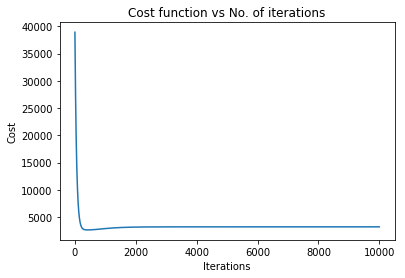

In [59]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [56]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 2287.6617294290554


In [80]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.005 # Learning rate
temp = np.zeros((n+1,1))
iterations = 0
t = 10000

lambda1 = 20
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


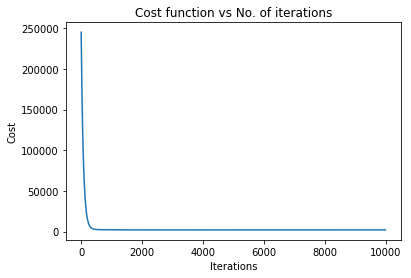

[[0.09704487 0.1850839  0.10462139 0.14077336 0.12996178 0.11435409]]


In [81]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

print(w)

In [66]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.1 # Learning rate
temp = np.zeros((n+1,1))
iterations = 0
t = 10000

lambda1 = 2000
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


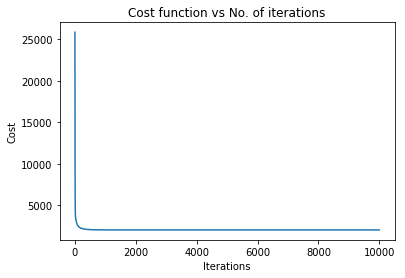

[[0.10274    0.17997204 0.09069835 0.14850956 0.13090175 0.11487432]]


In [74]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

print(w)

In [75]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
iterations = 0
t = 10000

lambda1 = 200
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


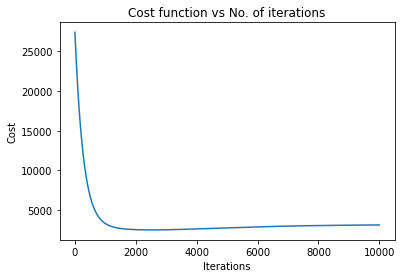

[[0.13085523 0.06450496 0.06830254 0.05281103 0.06711752 0.06651423]]


In [76]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

print(w)

In [77]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.1 # Learning rate
temp = np.zeros((n+1,1))
iterations = 0
t = 10000

lambda1 = 20
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i]*(1 - alpha*lambda1/m) - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 6)
w.shape: (1, 6)
y.shape: (546, 1)


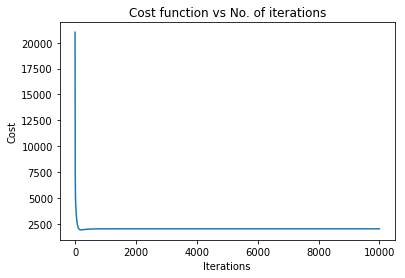

[[0.10274    0.17997204 0.09069835 0.14850956 0.13090175 0.11487432]]


In [79]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

print(w)